# Briefly, what is a perceptron?

A neuron is the basic functioning unit of the brain, similarly a perceptron is the basic functioning unit of a neural network. In this post I’ll briefly cover the similarities between artificial and biological neural networks, the theory behind how perceptrons work, and lastly how to implement the algorithm in python to train it on a bioconcentration data set.

In animals, a neuron receives input from the synapses of other neurons at its dendrites. These tree like structures take the input signals and amalgamate them in the cell body, also known as a soma. Once the summation of signals happens in the soma, gated ion channels will open or remain closed depending on whether the signal breaches a threshold value — causing the neuron to fire along the axon or remain static. The neuron either fires or it doesn’t.

<img src="perceptron.png">


There are a few components in the image I put together above that we should go over to understand the model better:
    
### Input & bias: 
The dendrite of the biological neuron accepts input as neurotransmitters from connecting synapses. The counterpart in the perceptron model is the input (a feature used for the classification) multiplied by it’s respective weight. The weights are values which change over time when training the model as they update in the “learning” phase when an error occurs during training. A bias is added as a special input to shift the decision boundary by translating points left or right. The summation equation below shows how the inputs, weights, and bias fit together.
<br>
<br>
<img src="summation.png">
<br>
<br>
In the image below is a sigmoid curve and if we were to change the weights we could alter the steepness of the slope but to actually shift the curve left or right you would need to add a bias. Translating all the points in a certain direction using bias can increase accuracy by helping separate the hyperplane.
<br>
<br>
<img src="sigmoid.jpeg">
<br>
<br>
***
### Activation function: 
The summation of excitatory and inhibiting ions in the soma of a neuron results in an action potential. If the action potential is excitatory and breaches the threshold value — a signal is fired. In an artificial neuron the activation function calculates the net output of the summed inputs. The perceptron is effectively the model’s decision maker and uses the heaviside function, which is also known as a step function, to calculate a predicted binary output. Below is the step function that is most commonly used:
<br>
<br>
<img src="stepfunc.png">
<br>
<br>
    θ is the activation function
    <br>
    z is the sum of the inputs multiplied by their weights (and bias if included)
<br>
<br>
***

### Output: 
The biological neuron propagates a signal down it’s axon if the threshold is reached, this is it’s output. A perceptron’s output too fires on an all or nothing basis and results in a binary classification of either 1 or -1.

**Note:** A more in depth article on this material can be found here.

### Step by step algorithm

The following is a rundown of the steps taken by the algorithm to predict and then learn.

    1. Set weights to small initial values
    2. Multiply the input and weight vectors then sum them up
    3. If the the summed value is greater than the threshold then a binary output will be computed
    4. Check to see if the predicted outcome was correct and then update weights accordingly
    5. Repeat the process for increased accuracy

Note: Another great article explaining why the algorithm works.

### Coding the perceptron

**Note:** I’ll be dissecting and explaining code examples from the book “Python Machine Learning” while mixing in code of my own. I’ll be going over each line of code for our perceptron.

The very first line of code will import numpy since we need to perform vector multiplication and draw on random numbers. We then create the perceptron class and initialize it and set parameter values for “epochs”, “learning_rate”, and randomState.
<br>
<br>
**epochs**— the number of times all training data is passed forward and backwards
<br>
<br>
**learning rate** — usually referred to as η (eta) and step size. This value updates the weights. When training  the data, the weights will be updated according to how much error they're responsible for, however the learning rate updates the weights with a fraction of this error. So weights are updated as such — weight + η(error).
<br>
<br>
**randomState**— is used a class for drawing pseudo random generated numbers for an instance. I’d advise against using random.seed() since it will impact the global numpy environment.

In [ ]:
import numpy as np

class Perceptron(object):
    
    def __init__(self, epochs = 100, learning_rate = 0.01, randomState = 42):
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.randomState = randomState

Here we define the fit function which takes x and y arguments.
<br>
<br>
**weights**— this parameter is used to set the weights to a random number instead of zero. Having zero as the starting weights causes a problem of symmetry. If the weight of all input values is zero then the error will also be zero and they will all be updated with the same magnitude. We generate a normal distribution with a mean of 0, a standard deviation of 0.01 and a draw size of 1 sample.
<br>
<br>
**errors**— is an empty list that we will append with errors we catch during training

In [ ]:
class Perceptron(object):
    
    def __init__(self, epochs = 100, learning_rate = 0.01, randomState = 42):
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.randomState = randomState
        
    def fit(self, x, y):
        rgen = np.random.RandomState(self.randomState)
        self.weights = rgen.normal(loc=0.0, scale=0.01, size=1 + x.shape[1])
        self.errors = []

The next chunk of code is a loop that falls within the fit function that we just defined. However, we’ll look at it separately line-by-line due to its many parts.

    1. we set the loop to iterate through each epoch
    2. set the error variable to 0 for each iteration
    3. here xi and target are two numbers in a tuple of x and y values that we input as our data
    4. set the update variable as the value we need to update our weights with, which is learning rate * the error
    5. the weights of the inputs are updated with the following formula: eights = weights + (update * xi)
    6. here we update the bias input as: weight = weight + update
    7. we now set the value of the errors variable as the update value
    8. lastly we append the list of errors we created earlier

In [ ]:
class Perceptron(object):
    
    def __init__(self, epochs = 100, learning_rate = 0.01, randomState = 42):
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.randomState = randomState
        
    def fit(self, x, y):
        rgen = np.random.RandomState(self.randomState)
        self.weights = rgen.normal(loc=0.0, scale=0.01, size=1 + x.shape[1])
        self.errors = []
    
        for i in range(self.epochs):
            errors = 0
            for xi, target in zip(x, y):
                update = self.learning_rate * (target - self.predict(xi))
                self.weights[1:] += update * xi
                self.weights[0] += update
                errors += int(update != 0.0)
            self.errors.append(errors)
        return self

The last block of the perceptron code will define the summation and prediction functions.
<br>
<br>
**summation**— we define our feature inputs as x and return the vector dot product of the weights and the inputs, along with the bias unit.
<br>
<br>
**predict**— using x (feature input) as the function argument, the function returns the 1 if summation(x) is greater than 0; -1 otherwise.

In [9]:
import numpy as np

class Perceptron(object):
    
    def __init__(self, epochs = 100, learning_rate = 0.01, randomState = 42):
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.randomState = randomState
        
    def fit(self, x, y):
        rgen = np.random.RandomState(self.randomState)
        self.weights = rgen.normal(loc=0.0, scale=0.01, size=1 + x.shape[1])
        self.errors = []
    
        for i in range(self.epochs):
            errors = 0
            for xi, target in zip(x, y):
                update = self.learning_rate * (target - self.predict(xi))
                self.weights[1:] += update * xi
                self.weights[0] += update
                errors += int(update != 0.0)
            self.errors.append(errors)
        return self

    def summation(self, x):
        return np.dot(x, self.weights[1:]) + self.weights[0]
    def predict(self, x):
        return np.where(self.summation(x) >= 0, 1, -1)

### Cleaning and preparing the data

I chose not to go with the classic data sets like Fisher’s iris data set and rather chose to find one relevant to the work I’m currently doing. This led me to a bioconcentration data set hosted by the University of Milano-Bicocca and can be found here (http://www.michem.unimib.it/download/data/mechanisms-of-bioconcentration/).

The data only needs a bit of touching up and is otherwise ready to use. In the following block of code is what I did to make the data usable with the perceptron model. The original data comes with 3 different classifications: (1) is mainly stored within lipid tissues, (2) has additional storage sites (e.g. proteins), or (3) is metabolized/eliminated [1]. Since our model will work with two prediction classes we can drop the (2) class label.

In [2]:
import pandas as pd

#Load data
#data = pd.read_csv(r"C:/Path/to/file/bcf_data.csv")

#drop all rows with a class 2 label
data = data.drop(data[data.Class == 2].index)

#replace the 3 class label with -1
data['Class'] = data['Class'].map({1: 1, 3: -1})

#drop the predefined set id
data = data.drop("Set", axis = 1)

data.head()

,CAS,SMILES,logBCF,logKOW,nHM,piPC09,PCD,X2Av,MLOGP,ON1V,N-072,B02[C-N],F04[C-O],Class
0,100-02-7,O=[N+](c1ccc(cc1)O)[O-],0.74,1.91,0,0.0,1.49,0.14,1.35,0.72,0,1,5,1
1,100-17-4,O=[N+](c1ccc(cc1)OC)[O-],0.93,2.03,0,0.0,1.47,0.14,1.70,0.88,0,1,5,1
2,100-18-5,c1cc(ccc1C(C)C)C(C)C,3.24,5.23,0,0.0,1.20,0.25,4.14,2.06,0,0,0,-1
3,100-25-4,O=[N+]([O-])c1ccc(cc1)[N+](=O)[O-],-0.40,1.46,0,0.0,1.69,0.13,1.89,0.79,0,1,8,-1
4,100-40-3,C=CC1CCC=CC1,2.24,3.93,0,0.0,0.52,0.25,2.65,1.31,0,0,0,1


We can now create our training data set to train the perceptron learning model:

In [7]:
import sklearn as sk
from sklearn.model_selection import train_test_split

#we seperate the class labels from the original dataframe
y=data.Class

#we need to drop the non-predictor columns and extract predictive features
x=data.drop(['Class', 'SMILES', 'CAS'], axis=1)

#using scikit learn we can easily partition our data and train the model with 85% of the data
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.15)

#in order to train the model we need to get a series of just the values from the dataframe
x2 = x_train.iloc[0:607, [0,1,2,3,4,5,6,7,8,9,10]].values

### Training the perceptron

This data set was chosen on a whim, and for a classifier to be as accurate as possible, the predictive features should be able to separate the groups along a plane. We could perform a PCA or another form of dimension reduction to figure out the most important features but that isn't the focus of this tutorial. The point is to see a if we can write and train a perceptron on a given set of classification data and how it performs on that data. The code block below plots the results for our training and looks at the number of updates over epochs — how much adjustment we have to perform over passes on the entire training data set.

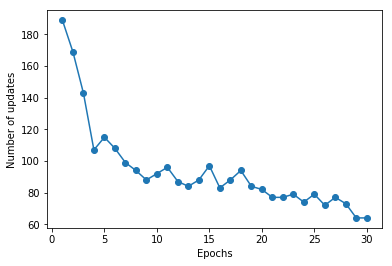

In [11]:
#after a few trial and error runs I stuck to these parameter values
perceptron_model = Perceptron(learning_rate = 0.25, epochs = 30)

#training the model
perceptron_model.fit(x2, y_train)

#modules needed for plotting the updates over epochs
import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline

#plotting the number of updates over epochs
plt.plot(range(1, len(perceptron_model.errors) + 1), perceptron_model.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

plt.show()

### Conclusion: Not great, but it works!

We see that although the number of updates oscillates, there is a general downward trend over iterations, that is to say, our perceptron algorithm is getting more accurate with each pass over the training data. We can’t say that it will reach zero (as it would with a less complex data set such as Fisher’s Iris) but we can say that our simple perceptron learning algorithm — from the 1960’s — did indeed “learn”.

### References

[1] F. Grisoni, V.Consonni, M.Vighi, S.Villa, R.Todeschini, Investigating the mechanisms of bioconcentration through QSAR classification trees (2016), Environment International